# 0. 데이터 파일 읽기

- [서울시 코로나19 확진자 현황](http://data.seoul.go.kr/dataList/OA-20279/S/1/datasetView.do)
## 컬럼
- ID : 확진자 ID. 발생순서대로 1씩증가하는 값
- 확진일: 확진 날짜
- 자치구: 확진 결과를 받은 지역구.
- 여행력: 해외유입의 경우 국가명
- 접촉력: 감염된 경로. 
- 현재상태: 퇴원, 사망, NA: 치료중

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/corona19_seoul_2021-03-15.csv')
df

,ID,확진일,자치구,여행력,접촉력,현재상태
0,30061,2021-03-14,동대문구,NaN,동대문구 소재 병원 관련(\'21.2.),사망
1,30060,2021-03-14,강동구,NaN,감염경로 조사중,NaN
2,30059,2021-03-14,타시도,NaN,관악구 소재 미용업 관련,NaN
3,30058,2021-03-14,마포구,NaN,감염경로 조사중,NaN
4,30057,2021-03-14,서대문구,NaN,타시도 확진자 접촉,NaN
...,...,...,...,...,...,...
30056,5,2020-01-31,마포구,NaN,기타 확진자 접촉,퇴원
30057,4,2020-01-30,종로구,중국,해외유입,퇴원
30058,3,2020-01-30,중랑구,NaN,종로구 집단발병,퇴원
30059,2,2020-01-30,강서구,중국,해외유입,퇴원


# 1. DataFrame 기본정보 조회

In [5]:
df.shape

(30061, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30061 entries, 0 to 30060
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      30061 non-null  int64 
 1   확진일     30061 non-null  object
 2   자치구     30061 non-null  object
 3   여행력     976 non-null    object
 4   접촉력     30061 non-null  object
 5   현재상태    27143 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.4+ MB


In [9]:
df.describe(include = 'object')
# 질문 : freq 이건 뭐를 의미하지? 

,확진일,자치구,여행력,접촉력,현재상태
count,30061,30061,976,30061,27143
unique,384,27,120,512,2
top,2020-12-17,기타,미국,기타 확진자 접촉,퇴원
freq,588,2000,329,9660,26738


In [10]:
df.head()

,ID,확진일,자치구,여행력,접촉력,현재상태
0,30061,2021-03-14,동대문구,NaN,동대문구 소재 병원 관련(\'21.2.),사망
1,30060,2021-03-14,강동구,NaN,감염경로 조사중,NaN
2,30059,2021-03-14,타시도,NaN,관악구 소재 미용업 관련,NaN
3,30058,2021-03-14,마포구,NaN,감염경로 조사중,NaN
4,30057,2021-03-14,서대문구,NaN,타시도 확진자 접촉,NaN


In [12]:
df.tail()

,ID,확진일,자치구,여행력,접촉력,현재상태
30056,5,2020-01-31,마포구,NaN,기타 확진자 접촉,퇴원
30057,4,2020-01-30,종로구,중국,해외유입,퇴원
30058,3,2020-01-30,중랑구,NaN,종로구 집단발병,퇴원
30059,2,2020-01-30,강서구,중국,해외유입,퇴원
30060,1,2020-01-24,강서구,중국,해외유입,퇴원


##  1.1 범주형 컬럼들의 고유값들 조회

In [15]:
# 자치구 고유값 조회
df['자치구'].unique()
df['자치구'].value_counts()

기타      2000
강서구     1704
송파구     1658
타시도     1413
관악구     1408
강남구     1376
노원구     1322
성북구     1298
은평구     1262
중랑구     1250
동작구     1238
서초구     1148
양천구     1144
영등포구    1122
구로구     1094
동대문구    1087
강동구     1036
마포구      990
도봉구      954
광진구      876
용산구      815
서대문구     786
강북구      785
성동구      763
종로구      579
금천구      478
중구       475
Name: 자치구, dtype: int64

In [17]:
# 여행력 고유값 조회
df['여행력'].unique()
df['여행력'].value_counts()

미국                 329
영국                  63
러시아                 36
인도네시아               34
필리핀                 33
                  ... 
오스트리아, 모로코, 프랑스      1
싱가포르                 1
에티오피나                1
캄보디아                 1
28238                1
Name: 여행력, Length: 120, dtype: int64

In [19]:
# 접촉력 고유값 조회
df['접촉력'].unique()
df['접촉력'].value_counts()

기타 확진자 접촉                   9660
감염경로 조사중                    6994
타시도 확진자 접촉                  1304
동부구치소 관련                    1175
해외유입                         965
                            ... 
타시도 확진자 접촉 (강원 강릉시 지인모임)       1
위에화엔터테인먼트                      1
타시도 확진자 접촉 (수원 베이비시터 관련)       1
관악구 투석환자 관련                    1
강남구 오렌지라이프 관련                  1
Name: 접촉력, Length: 512, dtype: int64

In [21]:
#현재상태 고유값 조회
df['현재상태'].unique()
df['현재상태'].value_counts()

퇴원    26738
사망      405
Name: 현재상태, dtype: int64

# 2. 확진일 확진자수 정보 조회

## 2.1 확진일의 빈도수

In [96]:
day_count = df['확진일'].value_counts()
day_count

2020-12-17    588
2020-12-24    566
2020-12-28    524
2020-12-25    430
2020-12-16    427
             ... 
2020-05-01      1
2020-04-19      1
2020-01-24      1
2020-03-05      1
2020-04-24      1
Name: 확진일, Length: 384, dtype: int64

> ### datetime으로 변환
> - `pd.to_datetime(변환할 Series)`
> - x 또는 y 축이 날짜 일 경우 datetime 타입으로 처리하는 것이 좋다.
> - datetime을 변환하면 날짜만의 기능을 다룰 수 있다.
>     - dt accessor를 이용해 datetime의 속성값들을(년, 월, 일 등) 추출할 수 있다.
>     - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html

## 2.2 확진일을 datetime으로 변환

In [36]:
df['확진일']

0        2021-03-14
1        2021-03-14
2        2021-03-14
3        2021-03-14
4        2021-03-14
            ...    
30056    2020-01-31
30057    2020-01-30
30058    2020-01-30
30059    2020-01-30
30060    2020-01-24
Name: 확진일, Length: 30061, dtype: object

In [103]:
# 방법1. 기존에 로드된 csv파일내 '확진일' 컬럼을 datetime으로 변환 
df['확진일'] = pd.to_datetime(df['확진일'], format = '%Y-%m-%d')
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30061 entries, 0 to 30060
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      30061 non-null  int64         
 1   확진일     30061 non-null  datetime64[ns]
 2   자치구     30061 non-null  object        
 3   여행력     976 non-null    object        
 4   접촉력     30061 non-null  object        
 5   현재상태    27143 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.4+ MB


,ID,확진일,자치구,여행력,접촉력,현재상태
0,30061,2021-03-14,동대문구,NaN,동대문구 소재 병원 관련(\'21.2.),사망
1,30060,2021-03-14,강동구,NaN,감염경로 조사중,NaN
2,30059,2021-03-14,타시도,NaN,관악구 소재 미용업 관련,NaN
3,30058,2021-03-14,마포구,NaN,감염경로 조사중,NaN
4,30057,2021-03-14,서대문구,NaN,타시도 확진자 접촉,NaN


In [104]:
# 방법2. csv파일 로드 시 '확진일'컬럼을 datetime으로 변환
from datetime import datetime
df = pd.read_csv('data/corona19_seoul_2021-03-15.csv',
                parse_dates = ['확진일'],
                date_parser = lambda x : datetime.strptime(x,'%Y-%m-%d'))
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30061 entries, 0 to 30060
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      30061 non-null  int64         
 1   확진일     30061 non-null  datetime64[ns]
 2   자치구     30061 non-null  object        
 3   여행력     976 non-null    object        
 4   접촉력     30061 non-null  object        
 5   현재상태    27143 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(4)
memory usage: 1.4+ MB


,ID,확진일,자치구,여행력,접촉력,현재상태
0,30061,2021-03-14,동대문구,NaN,동대문구 소재 병원 관련(\'21.2.),사망
1,30060,2021-03-14,강동구,NaN,감염경로 조사중,NaN
2,30059,2021-03-14,타시도,NaN,관악구 소재 미용업 관련,NaN
3,30058,2021-03-14,마포구,NaN,감염경로 조사중,NaN
4,30057,2021-03-14,서대문구,NaN,타시도 확진자 접촉,NaN


## 2.3 확진일 관련 파생변수 추가
- 확진일에서 년을 추출해서 **'년'** 컬럼을 생성
- 확진일에서 월을 추출해서 **'월'** 컬럼을 생성
- 확진일에서 주(1년 중 몇번째 주)를 추출해서 **'주'** 컬럼을 생성
- 확진일에서 요일을 추출해서 **'요일'** 컬럼을 생성. 

In [105]:
df['년'] = df['확진일'].dt.year
df['월'] = df['확진일'].dt.month
df['주'] = df['확진일'].dt.isocalendar().week
df['요일'] = df['확진일'].dt.dayofweek
df

,ID,확진일,자치구,여행력,접촉력,현재상태,년,월,주,요일
0,30061,2021-03-14,동대문구,NaN,동대문구 소재 병원 관련(\'21.2.),사망,2021,3,10,6
1,30060,2021-03-14,강동구,NaN,감염경로 조사중,NaN,2021,3,10,6
2,30059,2021-03-14,타시도,NaN,관악구 소재 미용업 관련,NaN,2021,3,10,6
3,30058,2021-03-14,마포구,NaN,감염경로 조사중,NaN,2021,3,10,6
4,30057,2021-03-14,서대문구,NaN,타시도 확진자 접촉,NaN,2021,3,10,6
...,...,...,...,...,...,...,...,...,...,...
30056,5,2020-01-31,마포구,NaN,기타 확진자 접촉,퇴원,2020,1,5,4
30057,4,2020-01-30,종로구,중국,해외유입,퇴원,2020,1,5,3
30058,3,2020-01-30,중랑구,NaN,종로구 집단발병,퇴원,2020,1,5,3
30059,2,2020-01-30,강서구,중국,해외유입,퇴원,2020,1,5,3


## 2.4 요일 정수를 문자열(월,화,수,목,금,토,일)로 변경
- datetime에서 요일을 추출하면 정수로 반환된다.
    - dt.week 로 조회시 - 월요일: 0, 일요일: 6
    - dt.isocalendar()['week']로 조회시 - 월요일 : 1, 일요일: 7

In [106]:
# dayofweek으로 조회시 
def change_day_str(x) :
    if x == 0 :
        return '월'
    if x == 1 :
        return '화'
    if x == 2 :
        return '수'
    if x == 3 :
        return '목'
    if x == 4 :
        return '금'
    if x == 5 :
        return '토'
    if x == 6 :
        return '일'

df['요일'] = df['요일'].apply(change_day_str)
df

,ID,확진일,자치구,여행력,접촉력,현재상태,년,월,주,요일
0,30061,2021-03-14,동대문구,NaN,동대문구 소재 병원 관련(\'21.2.),사망,2021,3,10,일
1,30060,2021-03-14,강동구,NaN,감염경로 조사중,NaN,2021,3,10,일
2,30059,2021-03-14,타시도,NaN,관악구 소재 미용업 관련,NaN,2021,3,10,일
3,30058,2021-03-14,마포구,NaN,감염경로 조사중,NaN,2021,3,10,일
4,30057,2021-03-14,서대문구,NaN,타시도 확진자 접촉,NaN,2021,3,10,일
...,...,...,...,...,...,...,...,...,...,...
30056,5,2020-01-31,마포구,NaN,기타 확진자 접촉,퇴원,2020,1,5,금
30057,4,2020-01-30,종로구,중국,해외유입,퇴원,2020,1,5,목
30058,3,2020-01-30,중랑구,NaN,종로구 집단발병,퇴원,2020,1,5,목
30059,2,2020-01-30,강서구,중국,해외유입,퇴원,2020,1,5,목


### 참고 > Categorical Data 타입
> - 범주형 타입
> - 문자열과 차이점
>     - 내부적으로 정수로 관리되기 때문에 메모리를 절약 할 수 있다. 
>     - 사전적 순서와 논리적 순서가 다를 경우 논리적 순서로 정렬되도록 정의 할 수 있다.
>         - 사전적순서: Four One Three Two
>         - 논리적순서: One Two Three Four
> - str 타입 Series를 Categorical 타입으로 변환
>     - `pandas.categorical(변환할Series, [categories=[고유값 리스트], ordered=None])`
    - categories: 고유값 리스트를 지정한다. 생략할 경우 Series의 고유값들을 가지고 만든다.
        - 원하는 순서대로 지정하기 위해서는 설정한다.
    - ordered: 순성형 여부 설정

## 2.5 요일을 Categorical Type으로 변환
# TODO : 이해가 안된다 우선은 패스

In [111]:
# 시리즈의 개념이 아직 제대로 들어오지가 않아.. 
day_week_cat = df['요일'].astype('category')
day_week_cat

0        일
1        일
2        일
3        일
4        일
        ..
30056    금
30057    목
30058    목
30059    목
30060    금
Name: 요일, Length: 30061, dtype: category
Categories (7, object): ['금', '목', '수', '월', '일', '토', '화']

In [113]:
day_week_cat.values.categories

Index(['금', '목', '수', '월', '일', '토', '화'], dtype='object')

In [115]:
day_week_cat.values.codes

array([4, 4, 4, ..., 1, 1, 0], dtype=int8)

## 2.6 확진자 수 변화 추이 시각화

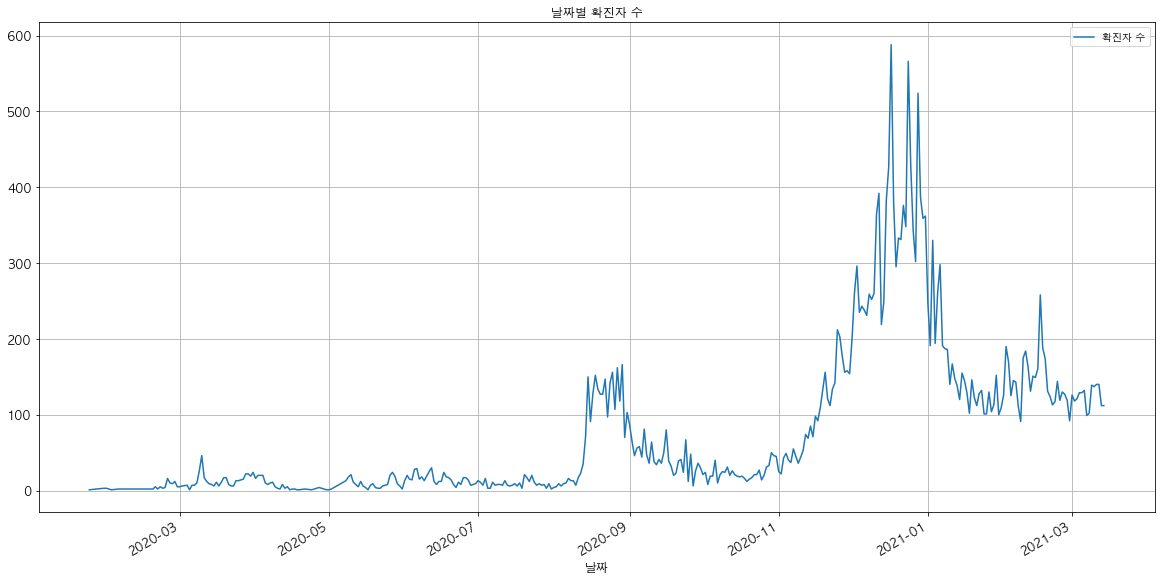

In [158]:
day_count.plot(kind = 'line', figsize = (20,10), label = '확진자 수')

plt.title('날짜별 확진자 수')
plt.xlabel('날짜')

plt.legend()
plt.grid(True)

plt.show()

## 2.7 2020년 12월 이후 확진일 기준으로 확진자 수 변화 추이 시각화

In [177]:
After_12 = df[df['확진일'] >= '2020-12-01']['확진일'].value_counts()
After_12
# After_12.sort_values()

2020-12-17    588
2020-12-24    566
2020-12-28    524
2020-12-25    430
2020-12-16    427
             ... 
2021-01-24    101
2021-01-30    100
2021-03-07     99
2021-02-28     92
2021-02-08     91
Name: 확진일, Length: 104, dtype: int64

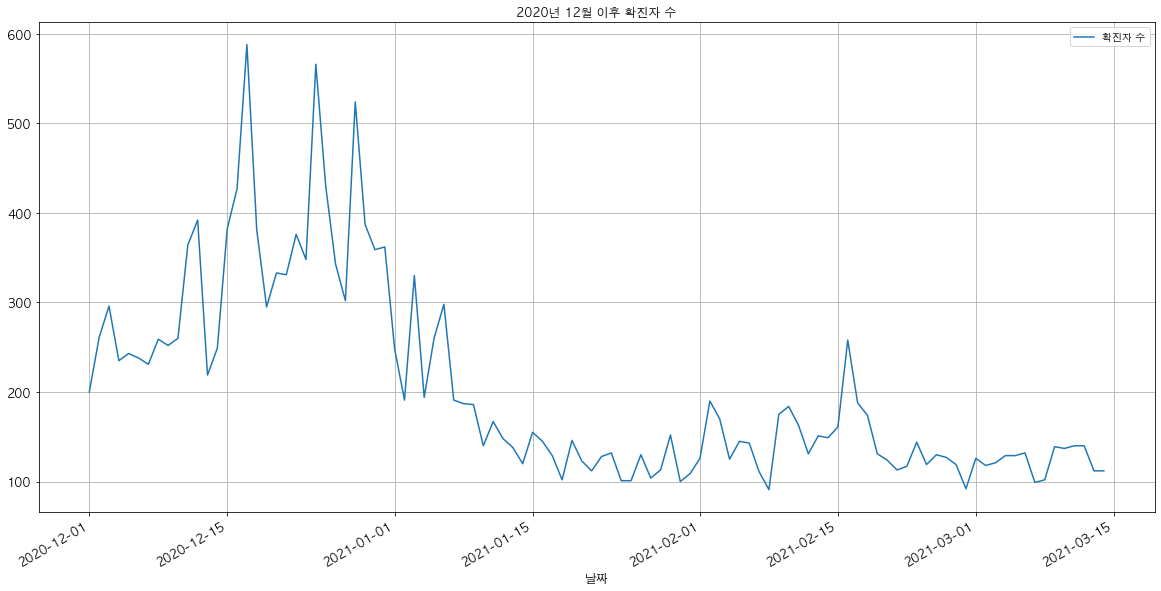

In [150]:
After_12.plot(kind = 'line', figsize = (20,10), label = '확진자 수')

plt.title('2020년 12월 이후 확진자 수')
plt.xlabel('날짜')

plt.legend()
plt.grid(True)
plt.show()

## 2.8 년도-주 단위 확진자 수 변화 추이 시각화
- ex) 2020년 1주차, 2020년 2주차 ... 

## 2.9 년-월 단위  확진자수 조회 및 시각화

## 2.10 월-요일별 확진자수 조회 및 시각화

# 3. 누적 확진자수 조회 및 변화 흐름 시각화
- Series/DataFrame.cumsum()
    - 누적 합계
- Series.to_frame()
    - Series를 DataFrame으로 변환

## 3.1 일별 누적 확진자수 조회

## 3.2 누적확진자수 파생변수 생성

## 3.3 누적 확진자수 선그래프

# 4. 자치구 기준 확진자 조회

## 4.1 자치구별 확진자수 조회

In [171]:
df['자치구'].unique()

array(['동대문구', '강동구', '타시도', '마포구', '서대문구', '은평구', '광진구', '용산구', '노원구',
       '동작구', '구로구', '관악구', '기타', '서초구', '영등포구', '양천구', '강남구', '송파구',
       '종로구', '중구', '강서구', '도봉구', '성북구', '강북구', '중랑구', '성동구', '금천구'],
      dtype=object)

In [175]:
df.pivot_table(index = '자치구',aggfunc = 'count')

,ID,년,여행력,요일,월,접촉력,주,현재상태,확진일
자치구,,,,,,,,,
강남구,1376,1376,79,1376,1376,1376,1376,1248,1376
강동구,1036,1036,29,1036,1036,1036,1036,902,1036
강북구,785,785,11,785,785,785,785,726,785
강서구,1704,1704,32,1704,1704,1704,1704,1616,1704
관악구,1408,1408,41,1408,1408,1408,1408,1330,1408
광진구,876,876,17,876,876,876,876,725,876
구로구,1094,1094,24,1094,1094,1094,1094,995,1094
금천구,478,478,10,478,478,478,478,437,478
기타,2000,2000,85,2000,2000,2000,2000,1626,2000


## 4.2 자치구별 확진자수 시각화

# 5. 접촉력 관련 확진자 조회

## 5.1 가장 많은 집단 감염자를 낸 접촉력 상위 15개 조회

## 5.2 가장 많은 집단 감염자를 낸 접촉력 하위 15 

## 5.3 접촉력 상위 15개만 시각화

## 5.4 확진자를 가장 많이 발생시킨 접촉력 상위 15개를 기준으로  월별 빈도수를 집계
- 몇 월에 발생했는지 확인 (년도는 무시)

# 6. 현재상태 관련조회

## 6.1 사망자 수/비율 조회

In [216]:
df['현재상태'].unique() # 사망, 퇴원, nan(치료중)
df['현재상태'].value_counts()
# df['현재상태'].value_counts()[0] # 사망자수 
# df['현재상태'].value_counts()[1] # 퇴원자수 
df.size

300610

In [234]:
# 각각 나눠서 확인해보기 --> 사실 이거는 아니죠. 
death_count = df['현재상태'].value_counts()[0]
discharge_count = df['현재상태'].value_counts()[1]

# 컬럼별 결측 값 개수 구하기 : df.isnull().sum()
df['현재상태'].isnull().sum() # 치료중 

# NaN값을 '치료중'으로 변경하기 df.fillna()
status = df['현재상태'].fillna('치료중')
status

0         사망
1        치료중
2        치료중
3        치료중
4        치료중
        ... 
30056     퇴원
30057     퇴원
30058     퇴원
30059     퇴원
30060     퇴원
Name: 현재상태, Length: 30061, dtype: object

In [235]:
status = df.set_index('현재상태')
status

,ID,확진일,자치구,여행력,접촉력,년,월,주,요일
현재상태,,,,,,,,,
사망,30061,2021-03-14,동대문구,NaN,동대문구 소재 병원 관련(\'21.2.),2021,3,10,일
NaN,30060,2021-03-14,강동구,NaN,감염경로 조사중,2021,3,10,일
NaN,30059,2021-03-14,타시도,NaN,관악구 소재 미용업 관련,2021,3,10,일
NaN,30058,2021-03-14,마포구,NaN,감염경로 조사중,2021,3,10,일
NaN,30057,2021-03-14,서대문구,NaN,타시도 확진자 접촉,2021,3,10,일
...,...,...,...,...,...,...,...,...,...
퇴원,5,2020-01-31,마포구,NaN,기타 확진자 접촉,2020,1,5,금
퇴원,4,2020-01-30,종로구,중국,해외유입,2020,1,5,목
퇴원,3,2020-01-30,중랑구,NaN,종로구 집단발병,2020,1,5,목


## 6.2 퇴원, 사망자, 치료중(NA)의 비율을 시각화

In [184]:
df['현재상태']

0         사망
1        NaN
2        NaN
3        NaN
4        NaN
        ... 
30056     퇴원
30057     퇴원
30058     퇴원
30059     퇴원
30060     퇴원
Name: 현재상태, Length: 30061, dtype: object